In [11]:
from MGRG.Graph import Graph
import numpy as np

In [ ]:
def study_error(latitude,enveloppe):
    d = 3
    results  = {'error_enveloppe':[],'error_latitude':[],'size':[]}
    listen = list(map(int,np.logspace(np.log10(20),3,20)))
    for n in listen:
        for _ in range(10):
            G = Graph(n, d, 'markov', latitude=latitude, enveloppe=enveloppe)
            G.HAC_R_study()
            results['error_enveloppe'].append(G.error_estimation_enveloppe())
            results['error_latitude'].append(G.error_estimation_latitude())
            results['size'].append(n)
    df = pd.DataFrame(results)
    df = df.apply(np.log10)
    return df

import seaborn as sns
def plot_errors(dataframe):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(121)
    sns.lineplot(x="size", y="error_enveloppe", err_style="bars", data=dataframe, ax = ax)
    #dataframe.plot(ax=ax, kind='scatter',x='size',y='error_enveloppe',color='red')
    ax.set_xlabel('$\log(n)$', fontsize=16)
    ax.set_ylabel('$\log(\delta_2(p^*,\hat{p}))$', fontsize=16)
    ax.set_title('Error Envelope function', fontsize=16)
    ax = fig.add_subplot(122)
    sns.lineplot(x="size", y="error_latitude", err_style="bars", data=dataframe, ax = ax)
    #dataframe.plot(ax=ax , kind='scatter',x='size',y='error_latitude',color='red')
    ax.set_xlabel('$\log(n)$', fontsize=16)
    ax.set_ylabel('$\log(\delta_2(f^*,\hat{f}))$', fontsize=16)
    ax.set_title('Error latitude function', fontsize=16)
    plt.show()

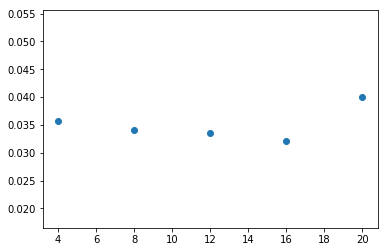

In [12]:
n = 400
d = 3
np.random.seed(4)
G = Graph(n, d, 'markov', latitude='default', enveloppe='sinus')
G.HAC_R_study(figure=True)